# 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|OK|
|2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|OK|
|3. 시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|OK|

### dataset
1.load_diabetes  
2.bike-sharing-demand

### 적용할 알고리즘 
1. Linear Regression 

### 회귀 성능 평가 지표  
1. MAE(Mean Absoute Error)
2. MSE(Mean Squared Error)
3. RMSE(Root Mean Squared Error)
4. R^2(결정계수)

## 문제 정의  
>**프로젝트 1**
> * Diabetes dataset에 손수 설계한 선형 회귀 모델 적용하여 1년 후의 당뇨 수치 예측   
> * 정확도 MSE 3000이하 달성  
  
>**프로젝트 2**
> * bike-sharing-demand dataset에 사이킷런의 선형 회귀 모델 적용하여 자전거 대여수 예측 
> * 정확도 RMSE 150 이하 달성


## 분석 결과  
 **1. 당뇨병 수치 예측**
 
|Evaluation|LinearRegression|
|:---------:|:----------:|
|MSE|2903.44 |
  
<hr/>

 **2. 자전거 대여량 예측**
 
 |Evaluation|LinearRegression|
 |:---------:|:----------:|
 |RMSE|97.23|

<hr/>  


## 분석환경

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

#import warnings
#warnings.filterwarnings("ignore", category=RuntimeWarning)

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(sklearn.__version__)

1.0


# 프로젝트 1 : 1년 후의 당뇨병 수치 예측하기

## 1. 데이터 가져오기

In [54]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()
type(diabetes)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

sklearn.utils.Bunch

In [55]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [56]:
# feature name
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [57]:
# featuer data 
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [58]:
# target data
diabetes.target


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### DF로 변환

In [59]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df['label'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [60]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  label   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Feature 및 Target data 분포 확인

<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='sex', ylabel='Density'>

<AxesSubplot:xlabel='bmi', ylabel='Density'>

<AxesSubplot:xlabel='s1', ylabel='Density'>

<AxesSubplot:xlabel='s2', ylabel='Density'>

<AxesSubplot:xlabel='s3', ylabel='Density'>

<AxesSubplot:xlabel='s4', ylabel='Density'>

<AxesSubplot:xlabel='s5', ylabel='Density'>

<AxesSubplot:xlabel='s6', ylabel='Density'>

<AxesSubplot:xlabel='label', ylabel='Density'>

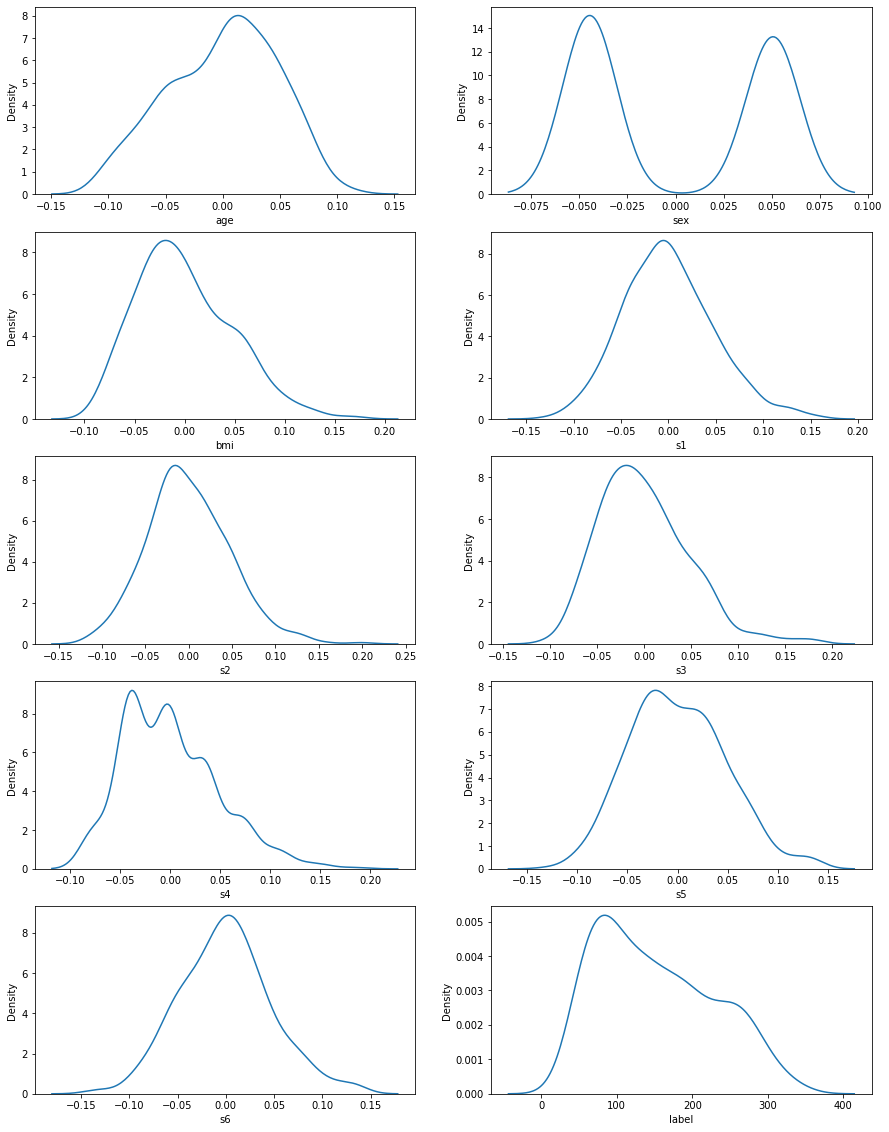

In [61]:
# data 분포 확인
fig, axs = plt.subplots(figsize=(15,20),ncols=2,nrows=5)
sns.kdeplot(x=diabetes_df['age'],ax=axs[0][0])
sns.kdeplot(x=diabetes_df['sex'],ax=axs[0][1])
sns.kdeplot(x=diabetes_df['bmi'],ax=axs[1][0])
sns.kdeplot(x=diabetes_df['s1'],ax=axs[1][1])
sns.kdeplot(x=diabetes_df['s2'],ax=axs[2][0])
sns.kdeplot(x=diabetes_df['s3'],ax=axs[2][1])
sns.kdeplot(x=diabetes_df['s4'],ax=axs[3][0])
sns.kdeplot(x=diabetes_df['s5'],ax=axs[3][1])
sns.kdeplot(x=diabetes_df['s6'],ax=axs[4][0])

sns.kdeplot(x=diabetes_df['label'],ax=axs[4][1])

* Featuer들은 모두 표준화되어 있음  
 모두 평균이 0이고 분산이 1인 가우시안 정규 분포로 변환이 되어 있음
* Target(label) data 정규 분포 형태로 변경위해 log 적용

<AxesSubplot:xlabel='label', ylabel='Density'>

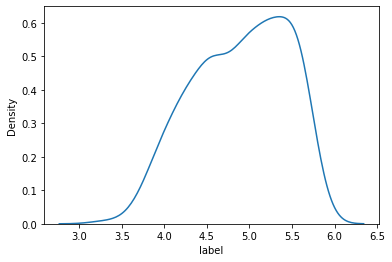

In [62]:
# target data에 log 적용 
y_log= np.log1p(diabetes_df['label'])
sns.kdeplot(y_log)
plt.show()

#### Featuer 간에 상관관계 조사

In [63]:
corr = diabetes_df.drop('label',axis=1).corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


<AxesSubplot:>

Text(0.5, 1.0, 'Diabetes correlation')

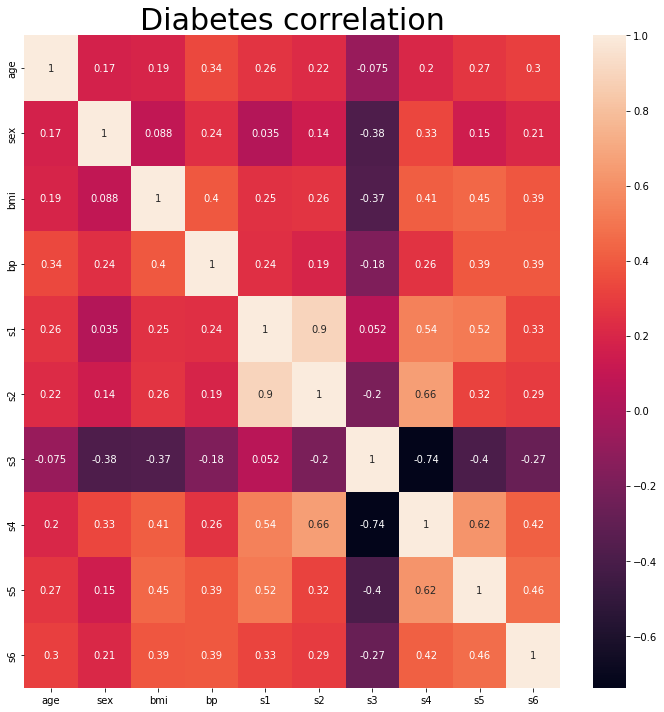

In [81]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True)

plt.title('Diabetes correlation', size=30)

s1과s2이 09, s3,s4가 0.74로 상관관계가 높음. 

## 2. 모델에 입력할 데이터 X 준비하기

In [65]:
#featuer_cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
featuers = ['age', 'sex', 'bmi','bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_X = diabetes_df[featuers]
X = df_X.values
X.shape
X

(442, 10)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## 3. 모델에 예측할 데이터 y 준비하기

In [66]:
#df_y = diabetes_df['label']
#y = df_y.values

y=y_log
y.shape
y



(442,)

0      5.023881
1      4.330733
2      4.955827
3      5.332719
4      4.912655
         ...   
437    5.187386
438    4.653960
439    4.890349
440    5.398163
441    4.060443
Name: label, Length: 442, dtype: float64

## 4. train 데이터와 test 데이터로 분리하기

In [67]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

## 5. 모델 준비하기

* 입력 데이터 개수에 맞는 가중치 W와 b를 준비
* 모델 함수를 구현

In [68]:
# 길이가 10개인 W와 1개의 숫자인 b 준비
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

W,b

(array([0.0207854 , 0.64803907, 0.20995909, 0.2952423 , 0.46436073,
        0.67327538, 0.96572131, 0.62897543, 0.53215639, 0.17003454]),
 0.41670179255699435)

In [69]:
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 6.손실함수 loss 정의하기

* 손실함수를 MSE 함수로 정의

In [70]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [71]:
def loss(X, W, b, y):
    predictions = model(X, W, b)

    #target에 log 적용한 경우 원래 스케일로 변환 
    predictions_exp = np.expm1(predictions)
    y_exp = np.expm1(y)
    
    L = MSE(predictions_exp, y_exp)
    return L

## 7.기울기를 구하는 gradient 함수 구현하기

In [72]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [73]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-0.00680389  0.00137147 -0.02498406 -0.01737747 -0.00352338 -0.00286967
  0.02018427 -0.01680612 -0.02392531 -0.01437785]
db: -8.946968639769647


## 8.하이퍼 파라미터인 학습률 설정하기

* 학습률, learning rate 를 설정
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험

In [74]:
LEARNING_RATE = 0.3

## 9 모델 학습하기

* 정의된 손실함수와 기울기 함수로 모델 학습
* loss값이 충분히 떨어질 때까지 학습 진행.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 무방. 다양한 데이터로 실험.

In [75]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3325.8307
Iteration 2000 : Loss 3260.4662
Iteration 3000 : Loss 3259.4763
Iteration 4000 : Loss 3251.5670
Iteration 5000 : Loss 3240.9579
Iteration 6000 : Loss 3230.4317
Iteration 7000 : Loss 3220.8187
Iteration 8000 : Loss 3212.2589
Iteration 9000 : Loss 3204.6825
Iteration 10000 : Loss 3197.9680
Iteration 11000 : Loss 3191.9918
Iteration 12000 : Loss 3186.6438
Iteration 13000 : Loss 3181.8296
Iteration 14000 : Loss 3177.4699
Iteration 15000 : Loss 3173.4987
Iteration 16000 : Loss 3169.8608
Iteration 17000 : Loss 3166.5102
Iteration 18000 : Loss 3163.4084
Iteration 19000 : Loss 3160.5230
Iteration 20000 : Loss 3157.8271


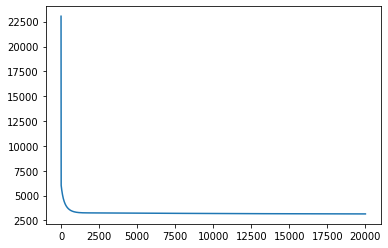

In [76]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [77]:
W,b

(array([ 0.33803768, -1.8045782 ,  3.20846378,  1.78133936, -1.72046092,
         1.3617351 , -2.14310559, -0.72054649,  4.78239054,  0.40496562]),
 4.879347909966279)

## 10. test 데이터에 대한 성능 확인하기

In [78]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2903.4477119849566

## 11. 정답 데이터와 예측한 데이터 시각화하기

* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화

Text(0.5, 0, 'age')

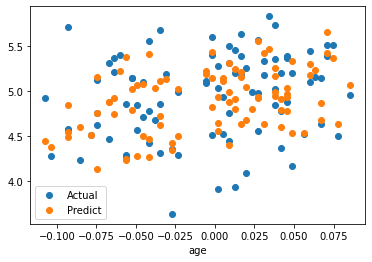

In [79]:
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], prediction, label='Predict')
plt.xlabel("age")
plt.legend()
plt.show()

* X_test 와 예측값 분포도

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='label', ylabel='Density'>

<AxesSubplot:xlabel='label', ylabel='Density'>

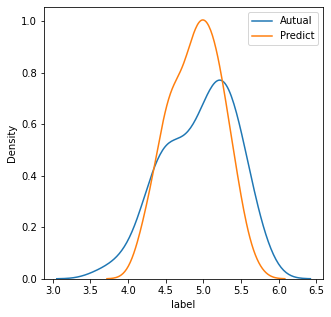

In [80]:
plt.figure(figsize=(5,5))
sns.kdeplot(y_test,label='Autual')
sns.kdeplot(prediction,label='Predict')
plt.legend()
plt.show()

# 프로젝트 2 : 자전거 대여량 예측하기

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

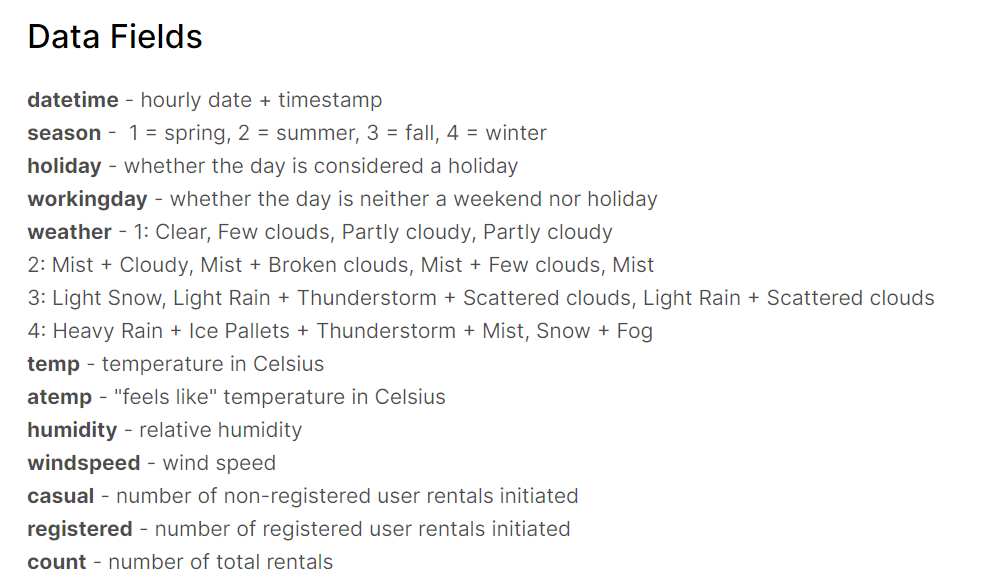

In [30]:
Image(filename="/aiffel/aiffel/Exploration/Exp02/bike-sharing-demand/bike_field.png")

In [31]:
# train.csv
file_path_train = '~/aiffel/Exploration/Exp02/bike-sharing-demand/train.csv'
bike_df = pd.read_csv(file_path_train)

bike_df.info()
bike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
# test.csv 
file_path_test = '~/aiffel/Exploration/Exp02/bike-sharing-demand/test.csv'
bike_df_test = pd.read_csv(file_path_test)
bike_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [33]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
#bike_df['datetime'] = bike_df['datetime'].astype('datetime64[ns]')
print(type(bike_df['datetime'].dtype))

bike_df['year'] = bike_df['datetime'].dt.year # 연도 정보
bike_df['month'] = bike_df['datetime'].dt.month # 월 정보
bike_df['day'] = bike_df['datetime'].dt.day # 일 정보
bike_df['hour'] = bike_df['datetime'].dt.hour # 시간 정보
bike_df['minute'] = bike_df['datetime'].dt.minute # 분 정보
bike_df['second'] = bike_df['datetime'].dt.second # 초 정보
bike_df

<class 'numpy.dtype[datetime64]'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='year', ylabel='count'>

<AxesSubplot:xlabel='month', ylabel='count'>

<AxesSubplot:xlabel='day', ylabel='count'>

<AxesSubplot:xlabel='hour', ylabel='count'>

<AxesSubplot:xlabel='minute', ylabel='count'>

<AxesSubplot:xlabel='second', ylabel='count'>

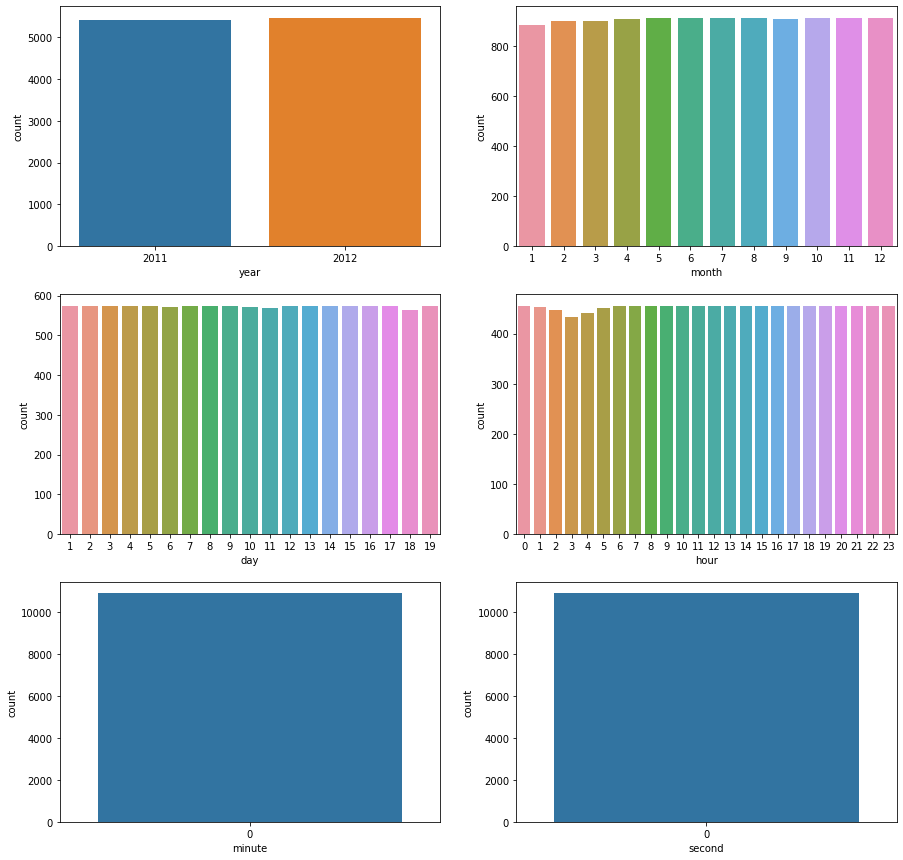

In [34]:
fig, axs = plt.subplots(figsize=(15,15),ncols=2,nrows=3)
sns.countplot(x=bike_df['year'],ax=axs[0][0])
sns.countplot(x=bike_df['month'],ax=axs[0][1])
sns.countplot(x=bike_df['day'],ax=axs[1][0])
sns.countplot(x=bike_df['hour'],ax=axs[1][1])
sns.countplot(x=bike_df['minute'],ax=axs[2][0])
sns.countplot(x=bike_df['second'],ax=axs[2][1])

### Featuer 및 Target data 분포 확인
 분석 제외 Feature 
 * datetime : 새롭게 year, month, hour 컬럼 추가
 * minute,second : 데이터 값이 0 
 * casual, registered : casual + registered = count 이므로 따로 필요치 않음

<AxesSubplot:xlabel='temp', ylabel='Density'>

<AxesSubplot:xlabel='atemp', ylabel='Density'>

<AxesSubplot:xlabel='humidity', ylabel='Density'>

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

<AxesSubplot:xlabel='year', ylabel='count'>

<AxesSubplot:xlabel='month', ylabel='count'>

<AxesSubplot:xlabel='day', ylabel='count'>

<AxesSubplot:xlabel='hour', ylabel='count'>

<AxesSubplot:xlabel='season', ylabel='count'>

<AxesSubplot:xlabel='holiday', ylabel='count'>

<AxesSubplot:xlabel='workingday', ylabel='count'>

<AxesSubplot:xlabel='count', ylabel='Density'>

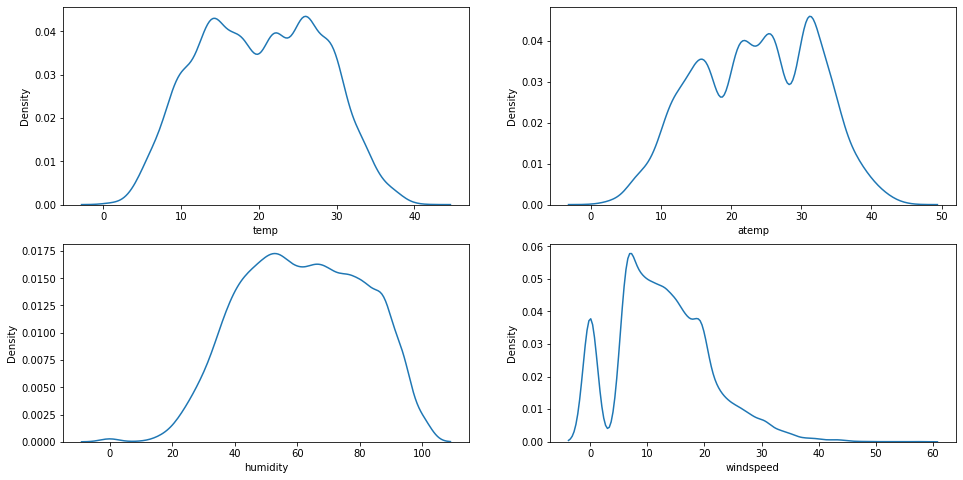

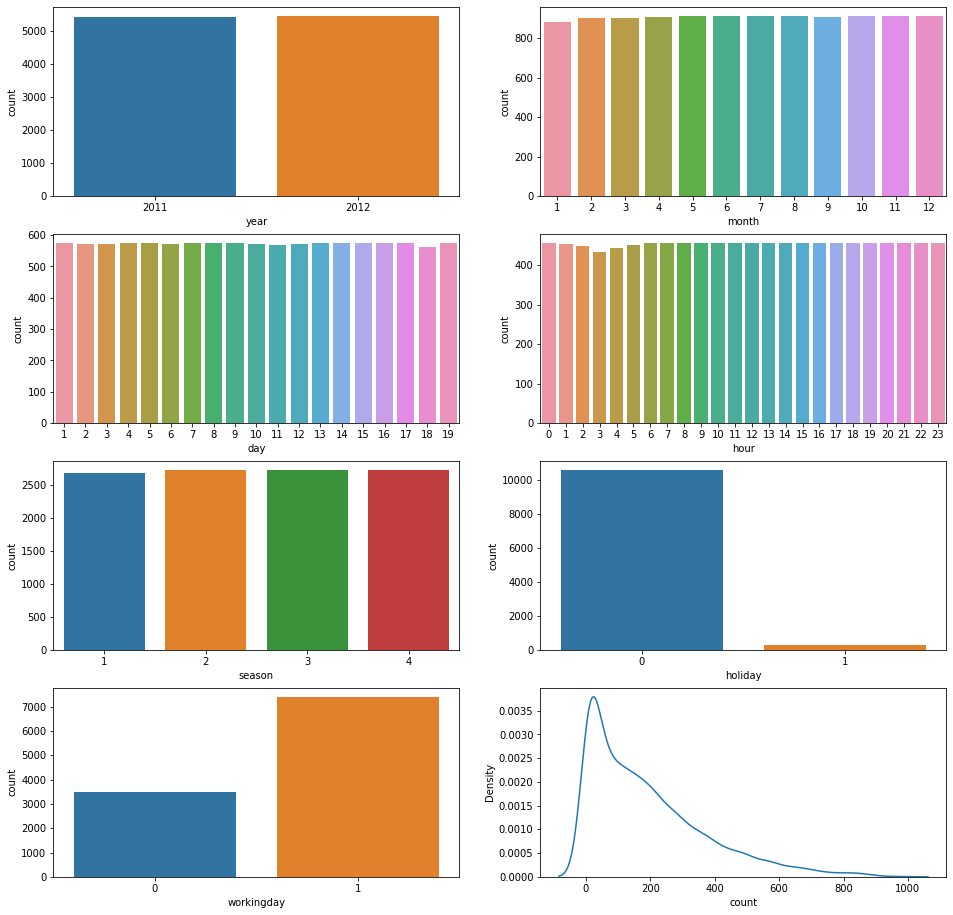

In [35]:
fig, axs = plt.subplots(figsize=(16,8),nrows=2,ncols=2)

sns.kdeplot(x=bike_df['temp'],ax=axs[0][0])
sns.kdeplot(x=bike_df['atemp'],ax=axs[0][1])
sns.kdeplot(x=bike_df['humidity'],ax=axs[1][0])
sns.kdeplot(x=bike_df['windspeed'],ax=axs[1][1])

fig, axs = plt.subplots(figsize=(16,16),nrows=4,ncols=2)
sns.countplot(x=bike_df['year'],ax=axs[0][0])
sns.countplot(x=bike_df['month'],ax=axs[0][1])
sns.countplot(x=bike_df['day'],ax=axs[1][0])
sns.countplot(x=bike_df['hour'],ax=axs[1][1])
sns.countplot(x=bike_df['season'],ax=axs[2][0])
sns.countplot(x=bike_df['holiday'],ax=axs[2][1])
sns.countplot(x=bike_df['workingday'],ax=axs[3][0])

sns.kdeplot(x=bike_df['count'],ax=axs[3][1])

target data 정규분포 형태로 변경  
 * target(count) data 0 ~ 200 사이에 집중되어 있어서 log 적용하여 정규 분포 형태로 변경 

<AxesSubplot:xlabel='count', ylabel='Density'>

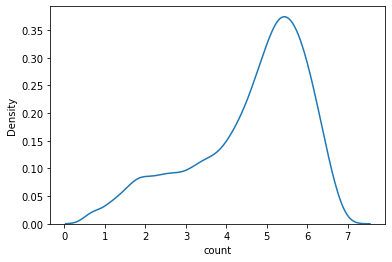

In [36]:
# target data에 log 적용 
y_log = np.log1p(bike_df['count'])
sns.kdeplot(y_log)

# target data에 log 미적용
#y = bike_df['count']



주요 칼럼별로 Target값인 count(대여수)가 어떻게 분포되어 있는지 확인

<AxesSubplot:xlabel='year', ylabel='count'>

<AxesSubplot:xlabel='month', ylabel='count'>

<AxesSubplot:xlabel='day', ylabel='count'>

<AxesSubplot:xlabel='hour', ylabel='count'>

<AxesSubplot:xlabel='season', ylabel='count'>

<AxesSubplot:xlabel='holiday', ylabel='count'>

<AxesSubplot:xlabel='workingday', ylabel='count'>

<AxesSubplot:xlabel='weather', ylabel='count'>

<AxesSubplot:xlabel='temp', ylabel='count'>

<AxesSubplot:xlabel='atemp', ylabel='count'>

<AxesSubplot:xlabel='humidity', ylabel='count'>

<AxesSubplot:xlabel='windspeed', ylabel='count'>

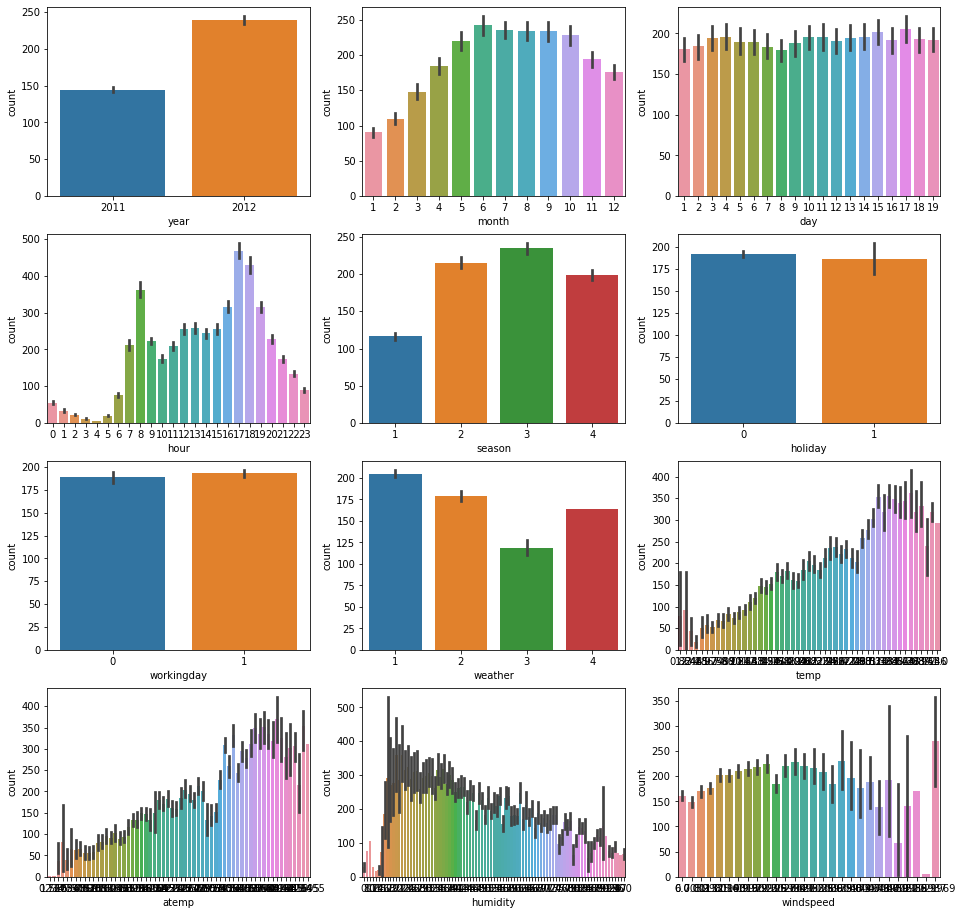

In [37]:
fig, axs = plt.subplots(figsize=(16,16),nrows=4,ncols=3)
features = ['year','month','day','hour','season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']

sns.barplot(data=bike_df,x='year',y='count',ax=axs[0][0])
sns.barplot(data=bike_df,x='month',y='count',ax=axs[0][1])
sns.barplot(data=bike_df,x='day',y='count',ax=axs[0][2])
sns.barplot(data=bike_df,x='hour',y='count',ax=axs[1][0])

sns.barplot(data=bike_df,x='season',y='count',ax=axs[1][1])
sns.barplot(data=bike_df,x='holiday',y='count',ax=axs[1][2])
sns.barplot(data=bike_df,x='workingday',y='count',ax=axs[2][0])

sns.barplot(data=bike_df,x='weather',y='count',ax=axs[2][1])
sns.barplot(data=bike_df,x='temp',y='count',ax=axs[2][2])
sns.barplot(data=bike_df,x='atemp',y='count',ax=axs[3][0])
sns.barplot(data=bike_df,x='humidity',y='count',ax=axs[3][1])
sns.barplot(data=bike_df,x='windspeed',y='count',ax=axs[3][2])




Featuer간의 상관관계 알아보기

<AxesSubplot:>

Text(0.5, 1.0, 'correlation')

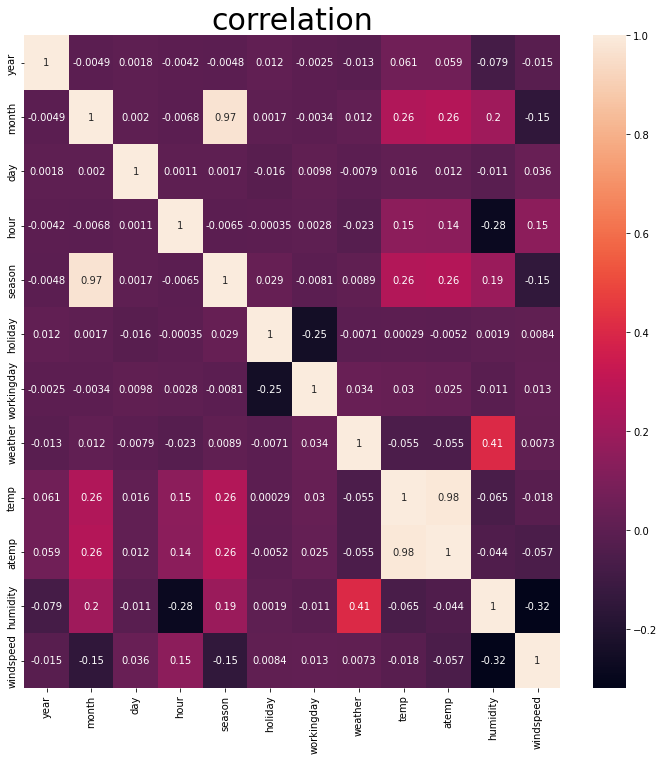

In [38]:
features = ['year','month','day','hour','season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
corr = bike_df[features].corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True)

plt.title('correlation', size=30)

상관관계 높은 featuer 
 * atemp와 temp
 * month 와 season

Featuer Encoding
 * 카테고리형 featuer에 one-hot encoding 적용

In [39]:
#feature_cols = ['year','month','day','hour','season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
features = ['year','month','day','hour','season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']

X_en = bike_df[features]
X_en = pd.get_dummies(X_en, columns=['year', 'month', 'day', 'hour','holiday','workingday','season','weather'])

X_en

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


## 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [40]:
X_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   year_2011     10886 non-null  uint8  
 5   year_2012     10886 non-null  uint8  
 6   month_1       10886 non-null  uint8  
 7   month_2       10886 non-null  uint8  
 8   month_3       10886 non-null  uint8  
 9   month_4       10886 non-null  uint8  
 10  month_5       10886 non-null  uint8  
 11  month_6       10886 non-null  uint8  
 12  month_7       10886 non-null  uint8  
 13  month_8       10886 non-null  uint8  
 14  month_9       10886 non-null  uint8  
 15  month_10      10886 non-null  uint8  
 16  month_11      10886 non-null  uint8  
 17  month_12      10886 non-null  uint8  
 18  day_1         10886 non-nu

In [41]:
X = X_en
y = y_log


X
y 

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_test, y_test

(8708, 73) (8708,)
(2178, 73) (2178,)


(       temp   atemp  humidity  windspeed  year_2011  year_2012  month_1  \
 2861  27.88  31.820        79     7.0015          1          0        0   
 9759  18.04  21.970        51     8.9981          0          1        0   
 9656  22.14  25.760        49    26.0027          0          1        0   
 373    8.20   9.850        44    12.9980          1          0        1   
 993   18.04  21.970        77    22.0028          1          0        0   
 ...     ...     ...       ...        ...        ...        ...      ...   
 8066  27.06  31.060        39    11.0014          0          1        0   
 1      9.02  13.635        80     0.0000          1          0        1   
 6591  16.40  20.455        54    12.9980          0          1        0   
 4201  17.22  21.210        88     0.0000          1          0        0   
 3745  22.14  25.760        94    15.0013          1          0        0   
 
       month_2  month_3  month_4  ...  workingday_0  workingday_1  season_1  \
 2861  

## 5. LinearRegression 모델 학습

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [44]:
predictions = lr.predict(X_test)
predictions

array([2.10912323, 4.32390594, 6.57790375, ..., 4.80347443, 2.56699371,
       3.52317047])

In [45]:
from sklearn.metrics import mean_squared_error

#target에 log 적용한 경우 원래 스케일로 변환 
y_test_exp = np.expm1(y_test)
predictions_exp = np.expm1(predictions)

mse = mean_squared_error(y_test_exp, predictions_exp)
#rmse = np.sqrt(mean_squared_error(y_test_exp, predictions_exp))
rmse = mean_squared_error(y_test_exp, predictions_exp,squared=False)

print(f'MSE: {mse}\nRMSE: {rmse}')

MSE: 9454.650466451685
RMSE: 97.23502695249117


In [46]:
# 회귀계수, 절편 확인
lr.coef_
lr.intercept_

array([ 9.02994771e-03,  1.51907372e-02, -3.28236996e-03, -3.22349895e-03,
       -1.76863964e+10, -1.76863964e+10, -2.67796242e+09, -2.67796242e+09,
       -2.67796242e+09, -1.35239272e+09, -1.35239272e+09, -1.35239272e+09,
        1.57835898e+10,  1.57835898e+10,  1.57835898e+10, -2.21174462e+09,
       -2.21174462e+09, -2.21174462e+09, -5.83849283e+08, -5.83849283e+08,
       -5.83849283e+08, -5.83849283e+08, -5.83849283e+08, -5.83849283e+08,
       -5.83849283e+08, -5.83849283e+08, -5.83849283e+08, -5.83849283e+08,
       -5.83849283e+08, -5.83849283e+08, -5.83849283e+08, -5.83849283e+08,
       -5.83849283e+08, -5.83849283e+08, -5.83849283e+08, -5.83849283e+08,
       -5.83849283e+08,  7.35107292e+08,  7.35107291e+08,  7.35107291e+08,
        7.35107290e+08,  7.35107290e+08,  7.35107291e+08,  7.35107292e+08,
        7.35107293e+08,  7.35107294e+08,  7.35107293e+08,  7.35107293e+08,
        7.35107293e+08,  7.35107293e+08,  7.35107293e+08,  7.35107293e+08,
        7.35107293e+08,  

41607221321.80633

## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'temperature')

Text(0, 0.5, 'count')

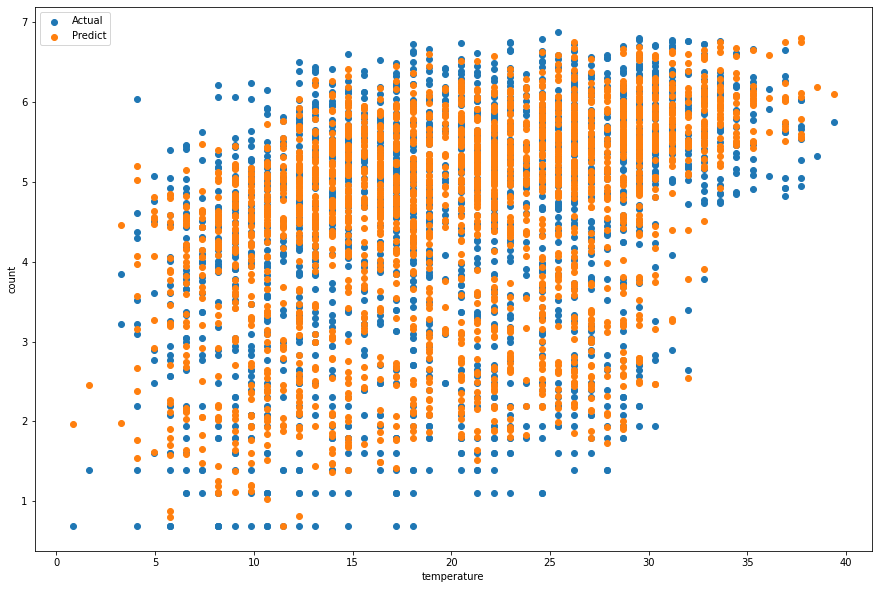

In [47]:
# x = temp 
plt.figure(figsize=(15,10))
plt.scatter(X_test['temp'], y_test, label="Actual")
plt.scatter(X_test['temp'], predictions, label="Predict")
plt.xlabel("temperature")
plt.ylabel("count")
plt.legend()
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'humidity')

Text(0, 0.5, 'count')

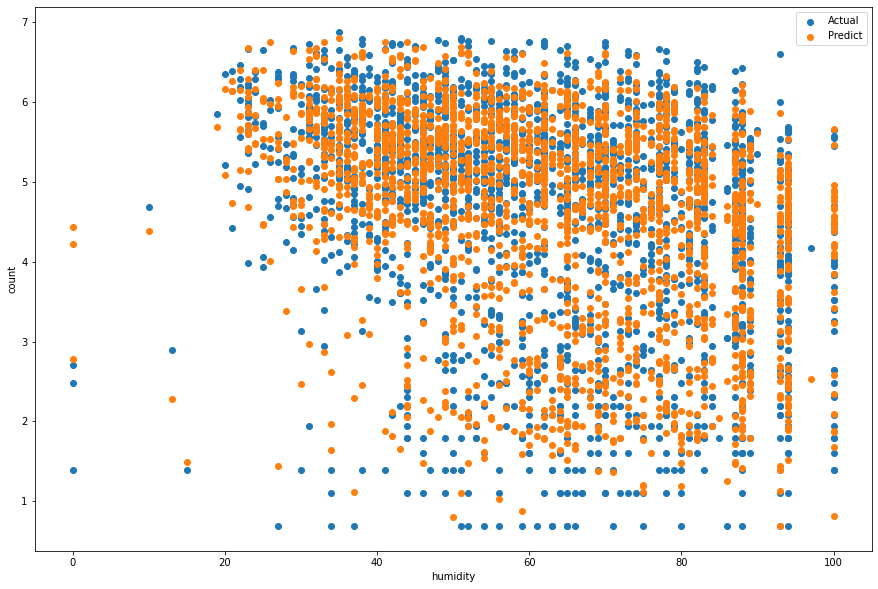

In [48]:
# x = humidity
plt.figure(figsize=(15,10))
plt.scatter(X_test['humidity'], y_test, label="Actual")
plt.scatter(X_test['humidity'], predictions, label="Predict")
plt.xlabel("humidity")
plt.ylabel("count")
plt.legend()
plt.show()

X_test 와 예측값 분포도

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Density'>

<AxesSubplot:xlabel='count', ylabel='Density'>

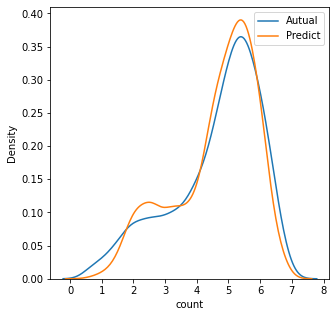

In [49]:
plt.figure(figsize=(5,5))
sns.kdeplot(y_test,label='Autual')
sns.kdeplot(predictions,label='Predict')

plt.legend()
plt.show()

## 회고

* learning rate 설정  
  * 프로젝트1에서 하이퍼 파라미터 learning rate을  0.0001 ~ 0.001 로 설정했을 때는 학습이 잘 되지 않았음.  
  * learning rate 값과 iteration 값을 수동으로 일일이 바꿔가며 최적의 값을 찾았는데,자동으로 최적의 값을 찾아주는 방법이 있을 꺼 같음

</br>

 * target data log 변환  
  * 선형 회귀 모델의 경우 feature data 와 target data의 분포가 정규 분포 형태일 경우 예측 성능이 좋을 가능성이 높기 때문에, 선형 회귀 모델에 적용하기 전에 정규화 작업을 수행했음
  * 프로젝트 1의 diabetes dataset의 경우는 featuer data는 표준 정규 분포로 되어 있어서, target data를 log 변환하여 선형 회귀 모델에적용하였음 
    * 적용 전과 mse 값에는 크게 변화가 없었음
  * 프로젝트 2의 bike-sharing-demand dataset의 경우에 target data를 log 변환하여 선형 회귀 모델에 적용하였음
    * 적용 전보다 rmse 값이 낮게 측정되어 예측 성능이 개선 됨
  * 선형 회귀 모델일 경우 target data
  * 로그 변환 후에 학습 및 테스트 후에 다시 원래 스케일로 변환을 해 주지 않아서 mse, rmse 갑이 이상하게 나왔었음.
 
 </br>
 
 * 상관관계가 높은 Feature 제거
  * 상관관계가 높은 Feauture 제거하고 선형 회귀 모델에 적용을 해도 제거 전과 크게 성능면에서 변화가 없었음
  * 수동으로 일일이 Featuer 제거 작업을 진행했는데, 이 부분은 자동화 함수를 만들어서 진행해야 함   
</br>

## 참고문헌

* https://wikibook.co.kr/pymldg-rev/